# ITALY COVID-19 DATA ANALYSIS

In this jupyter notebook, we'll try analyse italian COVID-19 data gathered from *Dipartimento di Protezione Civile* GitHub repository ([link](https://github.com/pcm-dpc/COVID-19)).

We'll first create $x$ axes with datetime objects and $y$ axes with total amount of
- confirmed cases
- recoveries
- deaths
- infected

where _infected_ are equal to _confirmed - (recoverd + deaths)_.

We won't reject outliers not loose any data, nor standardize or normalize data but we'll try to work with rough data only fitting confirmed, recoveries and deaths to logistic growth curves and infected to gaussian curve and try to get a forecast up to 7 days.

In [1]:
%matplotlib notebook

import json
import requests
import datetime as dt

from IPython.display import display, Math, Latex

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from scipy.optimize import curve_fit
import numpy as np

locator = mdates.AutoDateLocator()
formatter = mdates.ConciseDateFormatter(locator)

First, let's define the logistic function we'll use to fit data $$y = \frac{ L }{ 1 + e^{ -k( x - x_0 ) } }$$

In [13]:
def logistic_func(x, L, k, x0):
    return L / (1 + np.exp(-k * (x - x0)))

and the gaussian function for infected curve $$y = a \cdot e^{\frac{-(x - b)^2}{c^2}}$$

In [84]:
def gauss_func(x, a, b, c):
    d = - ((x - b) ** 2)
    return a * np.exp( d / (c ** 2) )

and get the most recently updated data from D.P.C. GitHub repository, loading them into a dictionary:

In [3]:
json_ita = "https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-json/dpc-covid19-ita-andamento-nazionale.json"
with requests.get(json_ita) as req:
    data = json.loads(req.content.decode('utf-8-sig'))

Let's check the dates of the downloaded data:

In [4]:
print("FIRST ENTRY DATE: {}".format(data[0]["data"].replace("T", " ")))

print("LAST  ENTRY DATE: {}".format(data[-1]["data"].replace("T", " ")))

period = (
    dt.datetime.strptime(data[-1]["data"], "%Y-%m-%dT%H:%M:%S") -
    dt.datetime.strptime(data[0]["data"], "%Y-%m-%dT%H:%M:%S")
).days

print("COVERAGE: {} days".format(period))

FIRST ENTRY DATE: 2020-02-24 18:00:00
LAST  ENTRY DATE: 2020-04-02 17:00:00
COVERAGE: 37 days


Now, let's initialize $x$ and $y$ variables (we'll need also integer $x$ array to perform `curve_fit`)

In [5]:
x = []   # datetime x array
_x = []  # integer x array
yC = []  # total confirmed cases array
yD = []  # total deaths array
yR = []  # total recovered array
yP = []  # total infected array

For each data entry:
- append datetime object to `x`
- append integer to `_x`
- append cases to $y$

In [7]:
for i, day in enumerate(data):
    if not i:
        continue
    date = dt.datetime.strptime(day["data"], "%Y-%m-%dT%H:%M:%S")
    # x values
    x.append(date)
    _x.append(i)
    # y values
    yC.append(day["totale_casi"])
    yD.append(day["deceduti"])
    yR.append(day["dimessi_guariti"])
    yP.append(day["totale_positivi"])

Let's take a look to gathered data

<IPython.core.display.Javascript object>


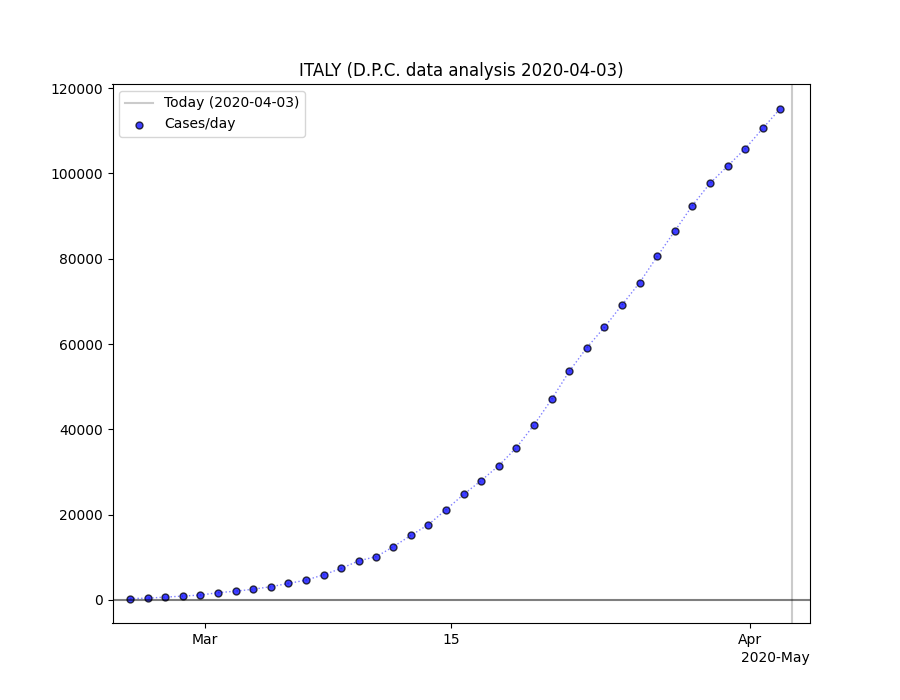

In [8]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[9, 7])
plt.title("ITALY (D.P.C. data analysis {})".format(dt.datetime.now().strftime("%Y-%m-%d")))
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)
ax.set_xlim(x[0] - dt.timedelta(days=1), max(x[-1], dt.datetime.now()) + dt.timedelta(days=1))

# original data points
ax.scatter(x, yC, alpha=0.75, c="#0000ff",edgecolors='#000000', marker="o", s=25, label="Cases/day")
# original data dotted line
ax.plot(x, yC, alpha=0.5, c="b", linestyle=":", linewidth=1.0)


# TODAY date grey vertical line
plt.axvline(x=dt.datetime.now(), color="#999999", alpha=0.5, linestyle="-", label="Today ({})".format(dt.datetime.now().strftime("%Y-%m-%d")))
plt.axhline(y=0, color="k", alpha=0.5)

# LEGEND
plt.legend(loc='upper left', fontsize='medium')
plt.show()

<IPython.core.display.Javascript object>


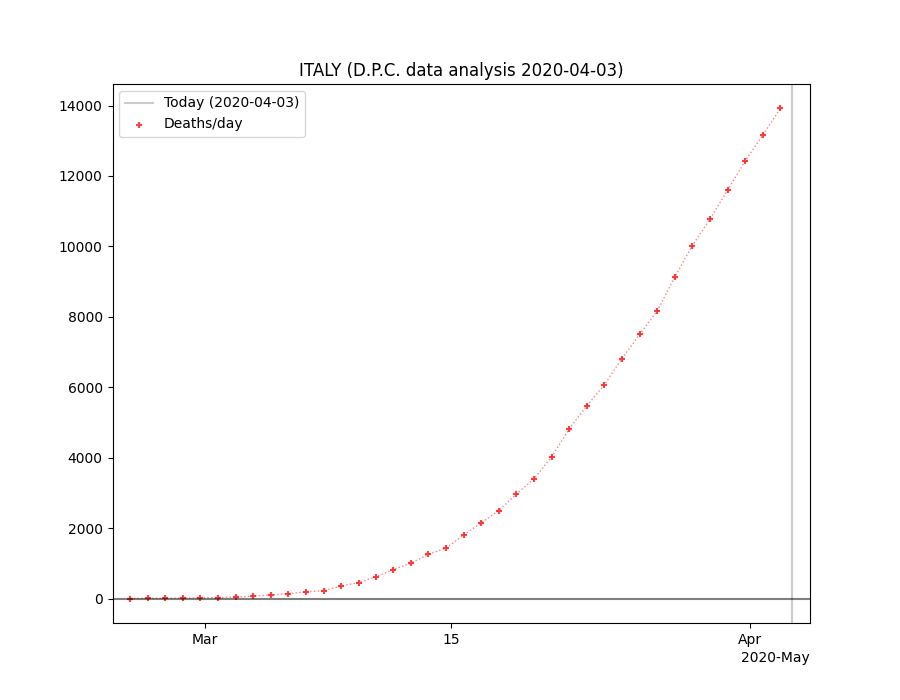

In [9]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[9, 7])
plt.title("ITALY (D.P.C. data analysis {})".format(dt.datetime.now().strftime("%Y-%m-%d")))
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)
ax.set_xlim(x[0] - dt.timedelta(days=1), max(x[-1], dt.datetime.now()) + dt.timedelta(days=1))

# original data points
ax.scatter(x, yD, alpha=0.75, c="r",edgecolors='#000000', marker="+", s=25, label="Deaths/day")
# original data dotted line
ax.plot(x, yD, alpha=0.5, c="r", linestyle=":", linewidth=1.0)


# TODAY date grey vertical line
plt.axvline(x=dt.datetime.now(), color="#999999", alpha=0.5, linestyle="-", label="Today ({})".format(dt.datetime.now().strftime("%Y-%m-%d")))
plt.axhline(y=0, color="k", alpha=0.5)

# LEGEND
plt.legend(loc='upper left', fontsize='medium')
plt.show()

<IPython.core.display.Javascript object>


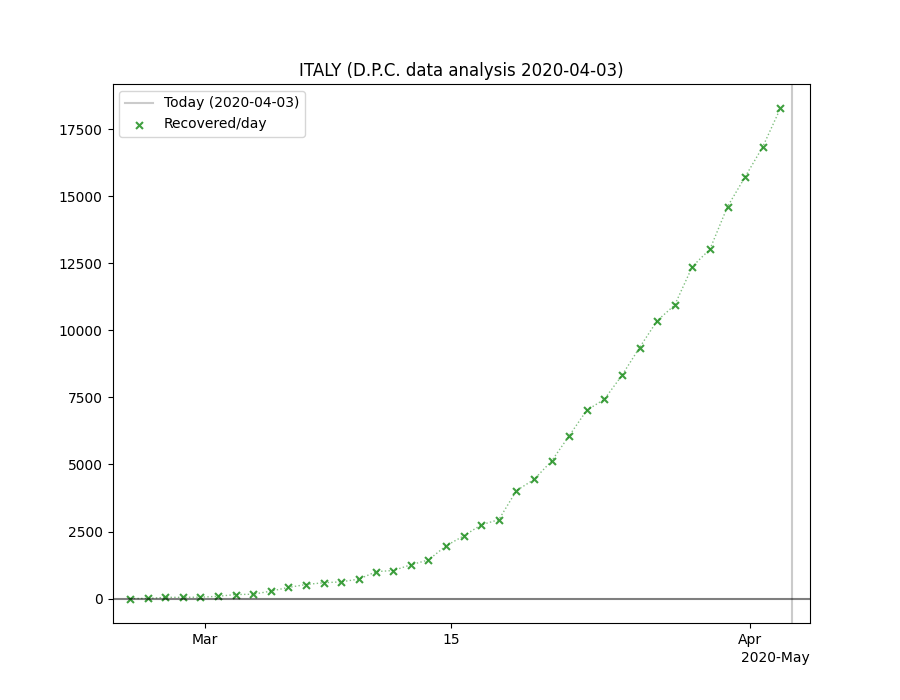

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[9, 7])
plt.title("ITALY (D.P.C. data analysis {})".format(dt.datetime.now().strftime("%Y-%m-%d")))
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)
ax.set_xlim(x[0] - dt.timedelta(days=1), max(x[-1], dt.datetime.now()) + dt.timedelta(days=1))

# original data points
ax.scatter(x, yR, alpha=0.75, c="g",edgecolors='#000000', marker="x", s=25, label="Recovered/day")
# original data dotted line
ax.plot(x, yR, alpha=0.5, c="g", linestyle=":", linewidth=1.0)


# TODAY date grey vertical line
plt.axvline(x=dt.datetime.now(), color="#999999", alpha=0.5, linestyle="-", label="Today ({})".format(dt.datetime.now().strftime("%Y-%m-%d")))
plt.axhline(y=0, color="k", alpha=0.5)

# LEGEND
plt.legend(loc='upper left', fontsize='medium')
plt.show()

<IPython.core.display.Javascript object>


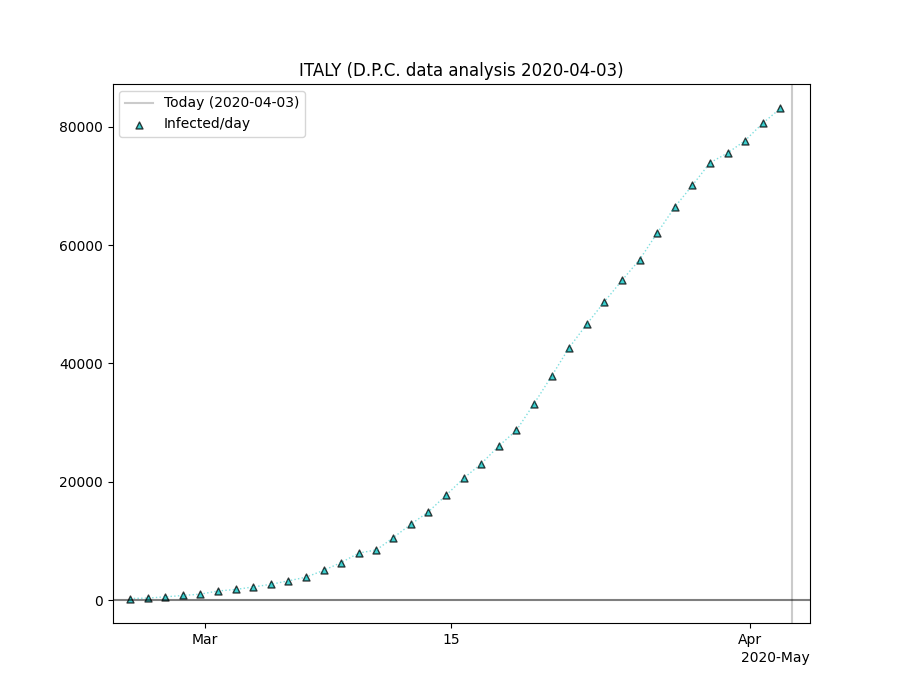

In [11]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[9, 7])
plt.title("ITALY (D.P.C. data analysis {})".format(dt.datetime.now().strftime("%Y-%m-%d")))
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)
ax.set_xlim(x[0] - dt.timedelta(days=1), max(x[-1], dt.datetime.now()) + dt.timedelta(days=1))

# original data points
ax.scatter(x, yP, alpha=0.75, c="c",edgecolors='#000000', marker="^", s=25, label="Infected/day")
# original data dotted line
ax.plot(x, yP, alpha=0.5, c="c", linestyle=":", linewidth=1.0)


# TODAY date grey vertical line
plt.axvline(x=dt.datetime.now(), color="#999999", alpha=0.5, linestyle="-", label="Today ({})".format(dt.datetime.now().strftime("%Y-%m-%d")))
plt.axhline(y=0, color="k", alpha=0.5)

# LEGEND
plt.legend(loc='upper left', fontsize='medium')
plt.show()

Let's now perform the `curve_fit` to the logistic function with the known values (using integer array values `_x` instead of datetime `x`) to get `popt = (L, k, x0)` parameters for each curve, guessing the maximum value of $y$ for $L$ parameter.
We'll also want get the `pcov` covariance of the fitted parameters and calculate the standard error `perr` we'll use later to plot standard error bands.

In [85]:
poptC, pcovC = curve_fit(logistic_func, _x, yC, p0=[max(yC), 1, 1])  # returns (a, b, c)
perrC = np.sqrt(np.diag(pcovC))
eSupC = poptC + perrC
eInfC = poptC - perrC

poptD, pcovD = curve_fit(logistic_func, _x, yD, p0=[max(yD), 1, 1])  # returns (a, b, c)
perrD = np.sqrt(np.diag(pcovD))
eSupD = poptD + perrD
eInfD = poptD - perrD

poptR, pcovR = curve_fit(logistic_func, _x, yR, p0=[max(yR), 1, 1])  # returns (a, b, c)
perrR = np.sqrt(np.diag(pcovR))
eSupR = poptR + perrR
eInfR = poptR - perrR

poptP, pcovP = curve_fit(gauss_func, _x, yP, p0=[max(yP), 1, 1])  # returns (a, b, c)
perrP = np.sqrt(np.diag(pcovP))
eSupP = poptP + perrP
eInfP = poptP - perrP

Here's what we found out

In [16]:
print("CONFIRMED")

display(Math(r"$L={:.2f} \pm {:.2f}$".format(poptC[0], perrC[0])))
display(Math(r"$k={:.2f} \pm {:.2f}$".format(poptC[1], perrC[1])))
display(Math(r"$x_0={:.2f} \pm {:.2f}$".format(abs(poptC[2]), perrC[2])))

CONFIRMED


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [17]:
print("DEATHS")

display(Math(r"$L={:.2f} \pm {:.2f}$".format(poptD[0], perrD[0])))
display(Math(r"$k={:.2f} \pm {:.2f}$".format(poptD[1], perrD[1])))
display(Math(r"$x_0={:.2f} \pm {:.2f}$".format(abs(poptD[2]), perrD[2])))

DEATHS


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [18]:
print("RECOVERED")

display(Math(r"$L={:.2f} \pm {:.2f}$".format(poptR[0], perrR[0])))
display(Math(r"$k={:.2f} \pm {:.2f}$".format(poptR[1], perrR[1])))
display(Math(r"$x_0={:.2f} \pm {:.2f}$".format(abs(poptC[2]), perrR[2])))

RECOVERED


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [86]:
print("INFECTED")

display(Math(r"$a={:.2f} \pm {:.2f}$".format(poptP[0], perrP[0])))
display(Math(r"$b={:.2f} \pm {:.2f}$".format(poptP[1], perrP[1])))
display(Math(r"$c={:.2f} \pm {:.2f}$".format(poptP[2], perrP[2])))

INFECTED


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Let's now prepare `xg` array (datetime objects) and `_xg` array (integer values) for the forecast. We'll forecast for as many days of gathered data `period`, from the last day `x[-1]`.

In [20]:
print("Forecast up to: {}".format(x[-1] + dt.timedelta(days=period + 1)))

# forecast x datetime objects
xg = [x[-1] + dt.timedelta(days=d + 1) for d in range(period)]
xg = x + xg
# forecast x integer values
_xg = [_x[-1] + d + 1 for d in range(period)]
_xg = _x + _xg

Forecast up to: 2020-05-10 17:00:00


Let's get the values of $y$ of the logistic curves and thier superior/inferior standard error, till the end of the forecast.

In [87]:
yCg = logistic_func(_xg, *poptC)
yCgSup = logistic_func(_xg, *eSupC)
yCgInf = logistic_func(_xg, *eInfC)

yDg = logistic_func(_xg, *poptD)
yDgSup = logistic_func(_xg, *eSupD)
yDgInf = logistic_func(_xg, *eInfD)

yRg = logistic_func(_xg, *poptR)
yRgSup = logistic_func(_xg, *eSupR)
yRgInf = logistic_func(_xg, *eInfR)

yPg = gauss_func(_xg, *poptP)
yPgSup = gauss_func(_xg, *eSupP)
yPgInf = gauss_func(_xg, *eInfP)

Let's take a look to fitted gaussian curves with standard error bands

<IPython.core.display.Javascript object>


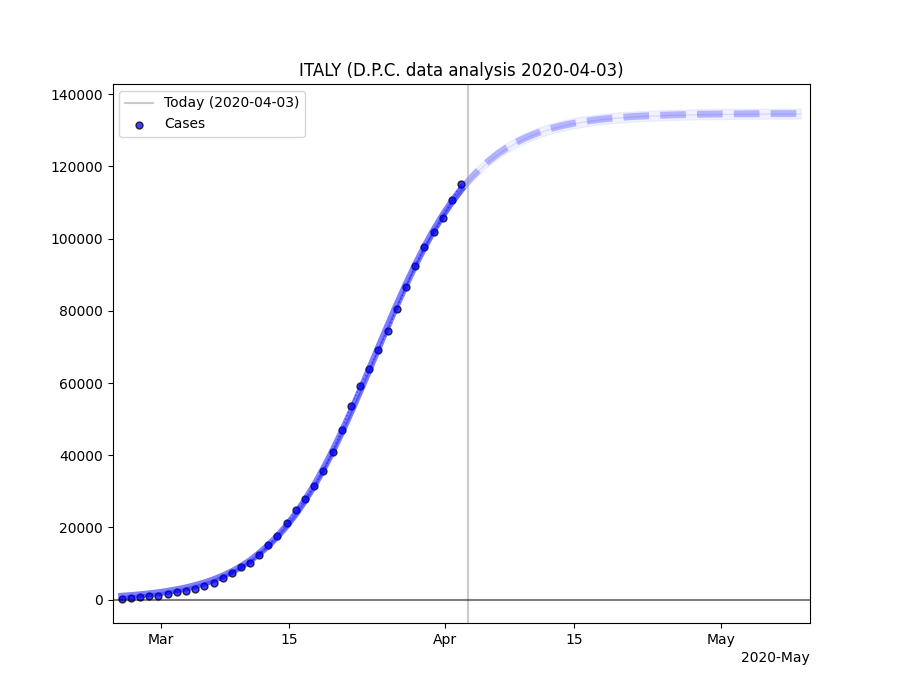

In [50]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[9, 7])
plt.title("ITALY (D.P.C. data analysis {})".format(dt.datetime.now().strftime("%Y-%m-%d")))
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)
ax.set_xlim(xg[0] - dt.timedelta(days=1), xg[-1] + dt.timedelta(days=1))

# original data points
ax.scatter(x, yC, alpha=0.75, c="b",edgecolors='#000000', marker="o", s=25, label="Cases")
# original data dotted line
ax.plot(x, yC, alpha=0.5, c="b", linestyle=":", linewidth=1.0)
# gaussian fitted curve up to forecast limit
ax.plot(xg[:len(x)], yCg[:len(x)], alpha=0.5, c="b", linestyle="-", linewidth=5.0)
ax.plot(xg[len(x) - 1:], yCg[len(x) - 1:], alpha=0.25, c="b", linestyle="--", linewidth=5.0)

ax.fill_between(xg[:len(x)], yCg[:len(x)], yCgSup[:len(x)], alpha=0.15, color="b")
ax.fill_between(xg[len(x) - 1:], yCg[len(x) - 1:], yCgSup[len(x) - 1:], alpha=0.05, color="b")
ax.fill_between(xg[:len(x)], yCg[:len(x)], yCgInf[:len(x)], alpha=0.15, color="b")
ax.fill_between(xg[len(x) - 1:], yCg[len(x) - 1:], yCgInf[len(x) - 1:], alpha=0.05, color="b")

# TODAY date grey vertical line
plt.axvline(x=dt.datetime.now(), color="#999999", alpha=0.5, linestyle="-", label="Today ({})".format(dt.datetime.now().strftime("%Y-%m-%d")))
plt.axhline(y=0, color="k", alpha=0.5)

# LEGEND
plt.legend(loc='upper left', fontsize='medium')
plt.show()

<IPython.core.display.Javascript object>


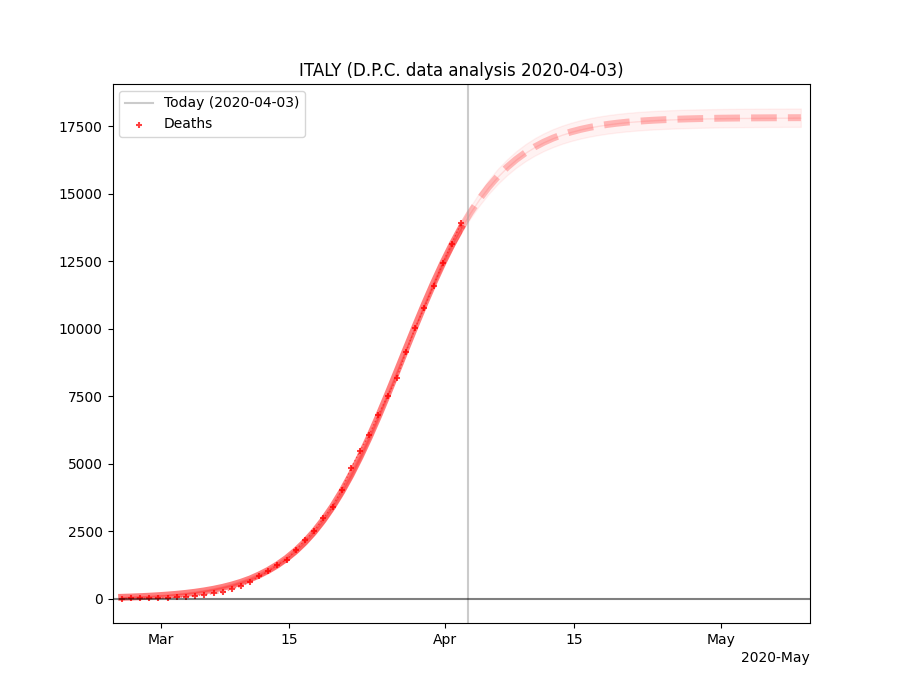

In [51]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[9, 7])
plt.title("ITALY (D.P.C. data analysis {})".format(dt.datetime.now().strftime("%Y-%m-%d")))
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)
ax.set_xlim(xg[0] - dt.timedelta(days=1), xg[-1] + dt.timedelta(days=1))

# original data points
ax.scatter(x, yD, alpha=0.75, c="r",edgecolors='#000000', marker="+", s=25, label="Deaths")
# original data dotted line
ax.plot(x, yD, alpha=0.5, c="r", linestyle=":", linewidth=1.0)
# gaussian fitted curve up to forecast limit
ax.plot(xg[:len(x)], yDg[:len(x)], alpha=0.5, c="r", linestyle="-", linewidth=5.0)
ax.plot(xg[len(x) - 1:], yDg[len(x) - 1:], alpha=0.25, c="r", linestyle="--", linewidth=5.0)

ax.fill_between(xg[:len(x)], yDg[:len(x)], yDgSup[:len(x)], alpha=0.15, color="r")
ax.fill_between(xg[len(x) - 1:], yDg[len(x) - 1:], yDgSup[len(x) - 1:], alpha=0.05, color="r")
ax.fill_between(xg[:len(x)], yDg[:len(x)], yDgInf[:len(x)], alpha=0.15, color="r")
ax.fill_between(xg[len(x) - 1:], yDg[len(x) - 1:], yDgInf[len(x) - 1:], alpha=0.05, color="r")

# TODAY date grey vertical line
plt.axvline(x=dt.datetime.now(), color="#999999", alpha=0.5, linestyle="-", label="Today ({})".format(dt.datetime.now().strftime("%Y-%m-%d")))
plt.axhline(y=0, color="k", alpha=0.5)

# LEGEND
plt.legend(loc='upper left', fontsize='medium')
plt.show()

<IPython.core.display.Javascript object>


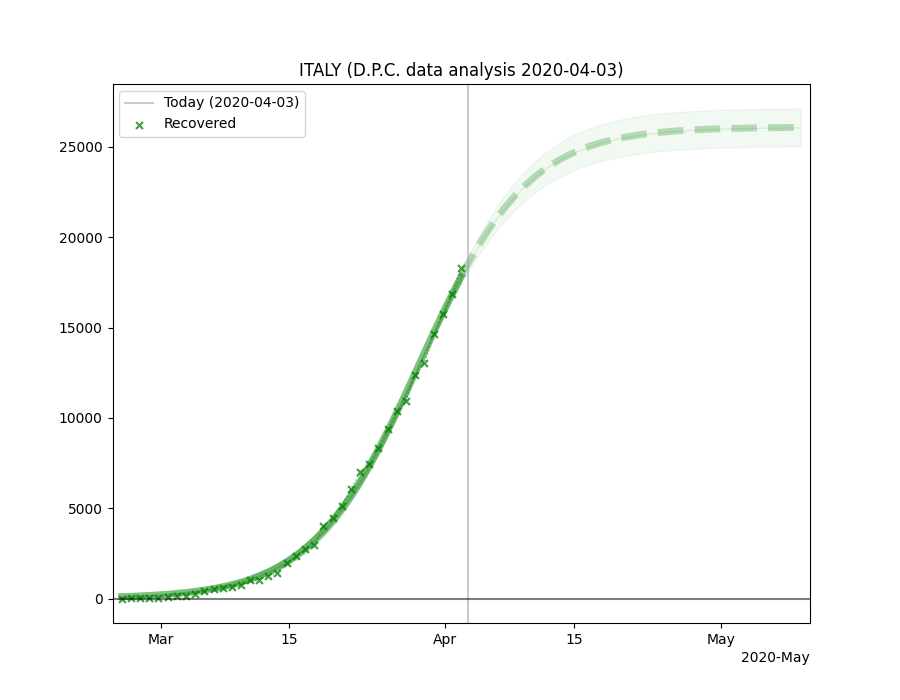

In [52]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[9, 7])
plt.title("ITALY (D.P.C. data analysis {})".format(dt.datetime.now().strftime("%Y-%m-%d")))
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)
ax.set_xlim(xg[0] - dt.timedelta(days=1), xg[-1] + dt.timedelta(days=1))

# original data points
ax.scatter(x, yR, alpha=0.75, c="g",edgecolors='#000000', marker="x", s=25, label="Recovered")
# original data dotted line
ax.plot(x, yR, alpha=0.5, c="g", linestyle=":", linewidth=1.0)
# gaussian fitted curve up to forecast limit
ax.plot(xg[:len(x)], yRg[:len(x)], alpha=0.5, c="g", linestyle="-", linewidth=5.0)
ax.plot(xg[len(x) - 1:], yRg[len(x) - 1:], alpha=0.25, c="g", linestyle="--", linewidth=5.0)

ax.fill_between(xg[:len(x)], yRg[:len(x)], yRgSup[:len(x)], alpha=0.15, color="g")
ax.fill_between(xg[len(x) - 1:], yRg[len(x) - 1:], yRgSup[len(x) - 1:], alpha=0.05, color="g")
ax.fill_between(xg[:len(x)], yRg[:len(x)], yRgInf[:len(x)], alpha=0.15, color="g")
ax.fill_between(xg[len(x) - 1:], yRg[len(x) - 1:], yRgInf[len(x) - 1:], alpha=0.05, color="g")

# TODAY date grey vertical line
plt.axvline(x=dt.datetime.now(), color="#999999", alpha=0.5, linestyle="-", label="Today ({})".format(dt.datetime.now().strftime("%Y-%m-%d")))
plt.axhline(y=0, color="k", alpha=0.5)

# LEGEND
plt.legend(loc='upper left', fontsize='medium')
plt.show()

<IPython.core.display.Javascript object>


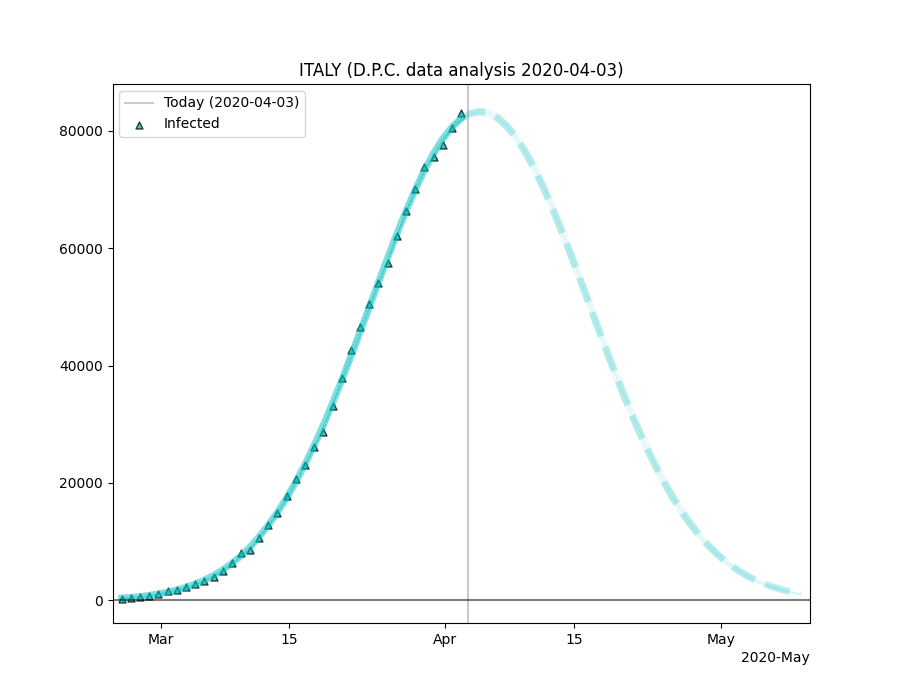

In [88]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[9, 7])
plt.title("ITALY (D.P.C. data analysis {})".format(dt.datetime.now().strftime("%Y-%m-%d")))
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)
ax.set_xlim(xg[0] - dt.timedelta(days=1), xg[-1] + dt.timedelta(days=1))

# original data points
ax.scatter(x, yP, alpha=0.75, c="c",edgecolors='#000000', marker="^", s=25, label="Infected")
# original data dotted line
ax.plot(x, yP, alpha=0.5, c="c", linestyle=":", linewidth=1.0)
# gaussian fitted curve up to forecast limit
ax.plot(xg[:len(x)], yPg[:len(x)], alpha=0.5, c="c", linestyle="-", linewidth=5.0)
ax.plot(xg[len(x) - 1:], yPg[len(x) - 1:], alpha=0.25, c="c", linestyle="--", linewidth=5.0)

ax.fill_between(xg[:len(x)], yPg[:len(x)], yPgSup[:len(x)], alpha=0.15, color="c")
ax.fill_between(xg[len(x) - 1:], yPg[len(x) - 1:], yPgSup[len(x) - 1:], alpha=0.05, color="c")
ax.fill_between(xg[:len(x)], yPg[:len(x)], yPgInf[:len(x)], alpha=0.15, color="c")
ax.fill_between(xg[len(x) - 1:], yPg[len(x) - 1:], yPgInf[len(x) - 1:], alpha=0.05, color="c")

# TODAY date grey vertical line
plt.axvline(x=dt.datetime.now(), color="#999999", alpha=0.5, linestyle="-", label="Today ({})".format(dt.datetime.now().strftime("%Y-%m-%d")))
plt.axhline(y=0, color="k", alpha=0.5)

# LEGEND
plt.legend(loc='upper left', fontsize='medium')
plt.show()

For each $y$ array, let's now get:
- maximum value $L$ and its standard error
- forecast values up to 7 days and their standard errors

For infected we can get
- the maximum $[x_{max}, y_{max}]$ coordinates and its standard error
  - in the standard gaussian curve, maximum coordinates are $[\mu, f(\mu)]$, in our gaussian function will then be $[b, f(b)]$ so we need to add $b - 1$ days to first $x_0$ date ($b - 1$ and not $b$ because we skeepped $x_0$) and calculate $y_{max} = f(b)$ with known parameters $(a, b, c)$
- the flexes $[x_{flex}, y_{flex}]$ coordinates and their standard error
  - the two flexes will obiviously be $[b-\sigma, f(b-\sigma)]$ and $[b+\sigma, f(b+\sigma)]$, so we first need to calculate $\sigma$ (the standard deviation):
    - $\sigma$ in our gaussian curve is equal to $c/\sqrt{2}$
- the guessed _~0 events/day_ and its standard error i.e. the day we could expect to have _almost_ no new event per day. We could choose this day as $\mu$ (the maximum, $b$) + three standard deviations $x_{0 cases} = b + 3\sigma$

In [65]:
# CONFIRMED CASES
LC, _, _ = poptC
supC = poptC + perrC
infC = poptC - perrC

LSupC, _, _ = supC
LInfC, _, _ = infC
# forecasts
yfC = {}
for i in range(7):
    yfC.update({i: {}})
    yfC[i].update({
        "date": x[-1] + dt.timedelta(days=i+1),
        "date_f": (x[-1] + dt.timedelta(days=i+1)).strftime("%Y-%m-%d"),
        "mean": logistic_func(_x[-1] + i + 1, *poptC),
        "sup": logistic_func(_x[-1] + i + 1, *supC),
        "inf": logistic_func(_x[-1] + i + 1, *infC)
    })

Let's do the same for the other curves

In [96]:
# DEATHS
LD, _, _ = poptD
supD = poptD + perrD
infD = poptD - perrD

LSupD, _, _ = supD
LInfD, _, _ = infD
# forecasts
yfD = {}
for i in range(7):
    yfD.update({i: {}})
    yfD[i].update({
        "date": x[-1] + dt.timedelta(days=i+1),
        "date_f": (x[-1] + dt.timedelta(days=i+1)).strftime("%Y-%m-%d"),
        "mean": logistic_func(_x[-1] + i + 1, *poptD),
        "sup": logistic_func(_x[-1] + i + 1, *supD),
        "inf": logistic_func(_x[-1] + i + 1, *infD)
    })

# RECOVERED
LR, _, _ = poptR
supR = poptR + perrR
infR = poptR - perrR

LSupR, _, _ = supR
LInfR, _, _ = infR
# forecasts
yfR = {}
for i in range(7):
    yfR.update({i: {}})
    yfR[i].update({
        "date": x[-1] + dt.timedelta(days=i+1),
        "date_f": (x[-1] + dt.timedelta(days=i+1)).strftime("%Y-%m-%d"),
        "mean": logistic_func(_x[-1] + i + 1, *poptR),
        "sup": logistic_func(_x[-1] + i + 1, *supR),
        "inf": logistic_func(_x[-1] + i + 1, *infR)
    })

# INFECTED
a, b, c = poptP
supP = poptP + perrP
infP = poptP - perrP
aSup, bSup, cSup = supP
aInf, bInf, cInf = infP
# the maximum x coordinate, datetime object
muP = x[0] + dt.timedelta(days=abs(b) - 1)
muPsup = x[0] + dt.timedelta(days=abs(bSup) - 1)
muPinf = x[0] + dt.timedelta(days=abs(bInf) - 1)
# the maximum x coordinate, integer value
_muP = _xg[0] + abs(b) - 1
# the maximum y coordinate, given (a, b, c) = popt values
ymuP = gauss_func(_muP, *poptP)
# calculate sigma
siP = abs(c / np.sqrt(2))
siPsup = abs(cSup / np.sqrt(2))
siPinf = abs(cInf / np.sqrt(2))
# 1st flex coordinates
f1P = muP - dt.timedelta(days=siP)
f1Psup = muPsup - dt.timedelta(days=siPsup)
f1Pinf = muPinf - dt.timedelta(days=siPinf)
yf1P = gauss_func(_muP - siP, *poptP)
# 2nd flex coordinates
f2P = muP + dt.timedelta(days=siP)
f2Psup = muPsup + dt.timedelta(days=siPsup)
f2Pinf = muPinf + dt.timedelta(days=siPinf)
yf2P = gauss_func(_muP + siP, *poptP)
# x coordinate of ~0 events/day
noP = muP + dt.timedelta(days=(3 * siP))
noPsup = muPsup + dt.timedelta(days=(3 * siPsup))
noPinf = muPinf + dt.timedelta(days=(3 * siPinf))

# forecasts
yfP = {}
for i in range(7):
    yfP.update({i: {}})
    yfP[i].update({
        "date": x[-1] + dt.timedelta(days=i+1),
        "date_f": (x[-1] + dt.timedelta(days=i+1)).strftime("%Y-%m-%d"),
        "mean": gauss_func(_x[-1] + i + 1, *poptP),
        "sup": gauss_func(_x[-1] + i + 1, *supP),
        "inf": gauss_func(_x[-1] + i + 1, *infP)
    })

Let's look each single plot with the forecasts

<IPython.core.display.Javascript object>


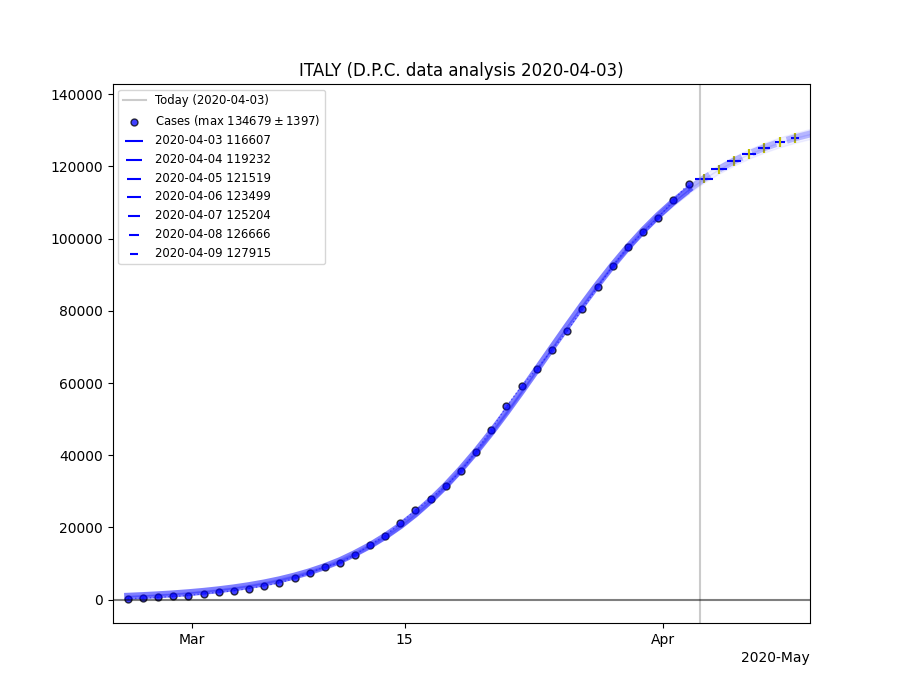

In [83]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[9, 7])
plt.title("ITALY (D.P.C. data analysis {})".format(dt.datetime.now().strftime("%Y-%m-%d")))
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)
ax.set_xlim(xg[0] - dt.timedelta(days=1), x[-1] + dt.timedelta(days=8))

# original data points
ax.scatter(x, yC, alpha=0.75, c="b",edgecolors='#000000', marker="o", s=25, label=r"Cases (max ${:.0f} \pm {:.0f}$)".format(LC, perrC[0]))
# original data dotted line
ax.plot(x, yC, alpha=0.5, c="b", linestyle=":", linewidth=1.0)
# logistic fitted curve up to forecast limit
ax.plot(xg[:len(x)], yCg[:len(x)], alpha=0.5, c="b", linestyle="-", linewidth=5.0)
ax.plot(xg[len(x) - 1:], yCg[len(x) - 1:], alpha=0.25, c="b", linestyle="--", linewidth=5.0)
ax.fill_between(xg[:len(x)], yCg[:len(x)], yCgSup[:len(x)], alpha=0.15, color="b")
ax.fill_between(xg[len(x) - 1:], yCg[len(x) - 1:], yCgSup[len(x) - 1:], alpha=0.05, color="b")
ax.fill_between(xg[:len(x)], yCg[:len(x)], yCgInf[:len(x)], alpha=0.15, color="b")
ax.fill_between(xg[len(x) - 1:], yCg[len(x) - 1:], yCgInf[len(x) - 1:], alpha=0.05, color="b")

# maximum and flexes
for i in range(7):
    ax.scatter(yfC[i]["date"], yfC[i]["mean"], color="b", marker="_", edgecolors='#000000', s=150 - i * 20, label="{} {:.0f}".format(yfC[i]["date_f"], yfC[i]["mean"]))
    plt.errorbar(yfC[i]["date"], yfC[i]["mean"], yerr=[yfC[i]["sup"] - yfC[i]["mean"]], uplims=[False], color="y")
    plt.errorbar(yfC[i]["date"], yfC[i]["mean"], yerr=[yfC[i]["mean"] - yfC[i]["inf"]], lolims=[False], color="y")

# TODAY date grey vertical line
plt.axvline(x=dt.datetime.now(), color="#999999", alpha=0.5, linestyle="-", label="Today ({})".format(dt.datetime.now().strftime("%Y-%m-%d")))
plt.axhline(y=0, color="k", alpha=0.5)

# LEGEND
plt.legend(loc='upper left', fontsize='small')
plt.show()

<IPython.core.display.Javascript object>


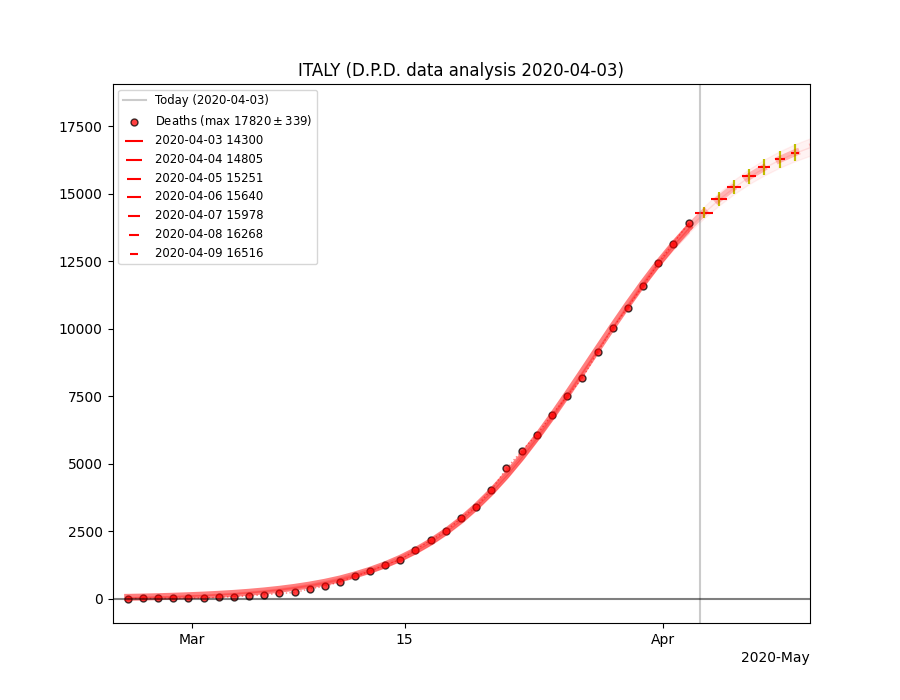

In [82]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[9, 7])
plt.title("ITALY (D.P.D. data analysis {})".format(dt.datetime.now().strftime("%Y-%m-%d")))
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)
ax.set_xlim(xg[0] - dt.timedelta(days=1), x[-1] + dt.timedelta(days=8))

# original data points
ax.scatter(x, yD, alpha=0.75, c="r",edgecolors='#000000', marker="o", s=25, label=r"Deaths (max ${:.0f} \pm {:.0f}$)".format(LD, perrD[0]))
# original data dotted line
ax.plot(x, yD, alpha=0.5, c="r", linestyle=":", linewidth=1.0)
# logistic fitted curve up to forecast limit
ax.plot(xg[:len(x)], yDg[:len(x)], alpha=0.5, c="r", linestyle="-", linewidth=5.0)
ax.plot(xg[len(x) - 1:], yDg[len(x) - 1:], alpha=0.25, c="r", linestyle="--", linewidth=5.0)
ax.fill_between(xg[:len(x)], yDg[:len(x)], yDgSup[:len(x)], alpha=0.15, color="r")
ax.fill_between(xg[len(x) - 1:], yDg[len(x) - 1:], yDgSup[len(x) - 1:], alpha=0.05, color="r")
ax.fill_between(xg[:len(x)], yDg[:len(x)], yDgInf[:len(x)], alpha=0.15, color="r")
ax.fill_between(xg[len(x) - 1:], yDg[len(x) - 1:], yDgInf[len(x) - 1:], alpha=0.05, color="r")

# maximum and flexes
for i in range(7):
    ax.scatter(yfD[i]["date"], yfD[i]["mean"], color="r", marker="_", edgecolors='#000000', s=150 - i * 20, label="{} {:.0f}".format(yfD[i]["date_f"], yfD[i]["mean"]))
    plt.errorbar(yfD[i]["date"], yfD[i]["mean"], yerr=[yfD[i]["sup"] - yfD[i]["mean"]], uplims=[False], color="y")
    plt.errorbar(yfD[i]["date"], yfD[i]["mean"], yerr=[yfD[i]["mean"] - yfD[i]["inf"]], lolims=[False], color="y")

# TODAY date grey vertical line
plt.axvline(x=dt.datetime.now(), color="#999999", alpha=0.5, linestyle="-", label="Today ({})".format(dt.datetime.now().strftime("%Y-%m-%d")))
plt.axhline(y=0, color="k", alpha=0.5)

# LEGEND
plt.legend(loc='upper left', fontsize='small')
plt.show()

<IPython.core.display.Javascript object>


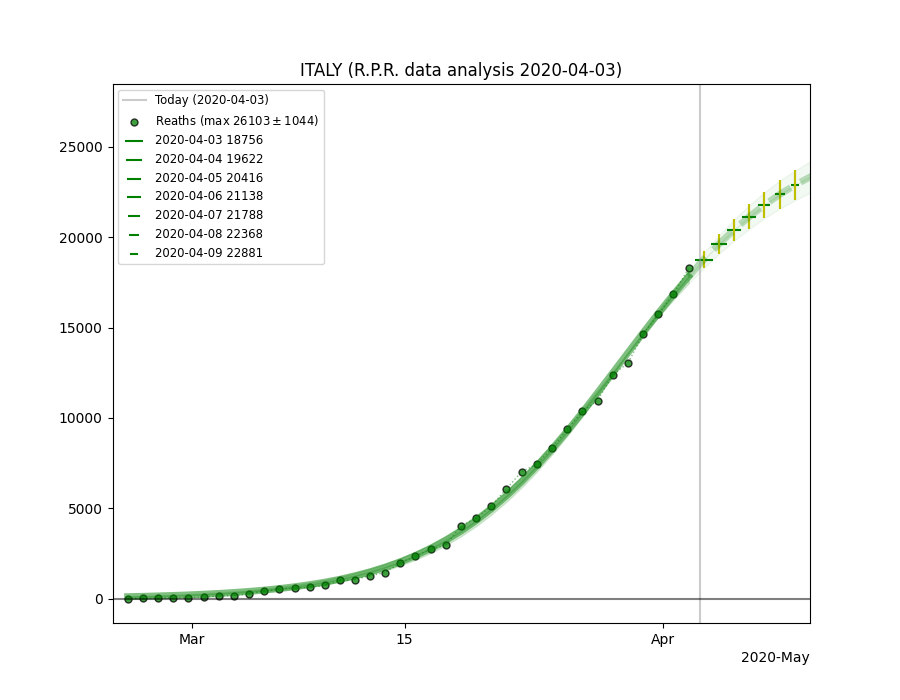

In [81]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[9, 7])
plt.title("ITALY (R.P.R. data analysis {})".format(dt.datetime.now().strftime("%Y-%m-%d")))
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)
ax.set_xlim(xg[0] - dt.timedelta(days=1), x[-1] + dt.timedelta(days=8))

# original data points
ax.scatter(x, yR, alpha=0.75, c="g",edgecolors='#000000', marker="o", s=25, label=r"Reaths (max ${:.0f} \pm {:.0f}$)".format(LR, perrR[0]))
# original data dotted line
ax.plot(x, yR, alpha=0.5, c="g", linestyle=":", linewidth=1.0)
# logistic fitted curve up to forecast limit
ax.plot(xg[:len(x)], yRg[:len(x)], alpha=0.5, c="g", linestyle="-", linewidth=5.0)
ax.plot(xg[len(x) - 1:], yRg[len(x) - 1:], alpha=0.25, c="g", linestyle="--", linewidth=5.0)
ax.fill_between(xg[:len(x)], yRg[:len(x)], yRgSup[:len(x)], alpha=0.15, color="g")
ax.fill_between(xg[len(x) - 1:], yRg[len(x) - 1:], yRgSup[len(x) - 1:], alpha=0.05, color="g")
ax.fill_between(xg[:len(x)], yRg[:len(x)], yRgInf[:len(x)], alpha=0.15, color="g")
ax.fill_between(xg[len(x) - 1:], yRg[len(x) - 1:], yRgInf[len(x) - 1:], alpha=0.05, color="g")

# maximum and flexes
for i in range(7):
    ax.scatter(yfR[i]["date"], yfR[i]["mean"], color="g", marker="_", edgecolors='#000000', s=150 - i * 20, label="{} {:.0f}".format(yfR[i]["date_f"], yfR[i]["mean"]))
    plt.errorbar(yfR[i]["date"], yfR[i]["mean"], yerr=[yfR[i]["sup"] - yfR[i]["mean"]], uplims=[False], color="y")
    plt.errorbar(yfR[i]["date"], yfR[i]["mean"], yerr=[yfR[i]["mean"] - yfR[i]["inf"]], lolims=[False], color="y")

# TORAY date grey vertical line
plt.axvline(x=dt.datetime.now(), color="#999999", alpha=0.5, linestyle="-", label="Today ({})".format(dt.datetime.now().strftime("%Y-%m-%d")))
plt.axhline(y=0, color="k", alpha=0.5)

# LEGENR
plt.legend(loc='upper left', fontsize='small')
plt.show()

<IPython.core.display.Javascript object>


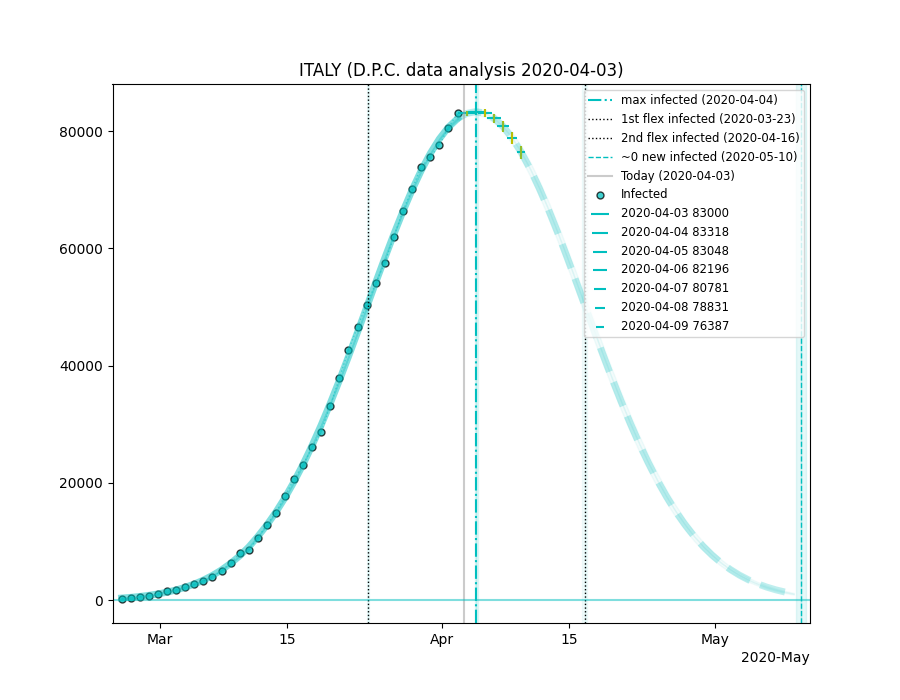

In [98]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[9, 7])
plt.title("ITALY (D.P.C. data analysis {})".format(dt.datetime.now().strftime("%Y-%m-%d")))
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)

ax.set_xlim(xg[0] - dt.timedelta(days=1), max(xg[-1], noP) + dt.timedelta(days=1))

# original data points
ax.scatter(x, yP, alpha=0.75, c="c",edgecolors='#000000', marker="o", s=25, label="Infected")
# original data dotted line
ax.plot(x, yP, alpha=0.5, c="c", linestyle=":", linewidth=1.0)
# gaussian fitted curve up to forecast limit
ax.plot(xg[:len(x)], yPg[:len(x)], alpha=0.5, c="c", linestyle="-", linewidth=5.0)
ax.plot(xg[len(x) - 1:], yPg[len(x) - 1:], alpha=0.25, c="c", linestyle="--", linewidth=5.0)
ax.fill_between(xg[:len(x)], yPg[:len(x)], yPgSup[:len(x)], alpha=0.15, color="c")
ax.fill_between(xg[len(x) - 1:], yPg[len(x) - 1:], yPgSup[len(x) - 1:], alpha=0.05, color="c")
ax.fill_between(xg[:len(x)], yPg[:len(x)], yPgInf[:len(x)], alpha=0.15, color="c")
ax.fill_between(xg[len(x) - 1:], yPg[len(x) - 1:], yPgInf[len(x) - 1:], alpha=0.05, color="c")
# maximum and flexes
plt.axvline(x=muP, linestyle="-.", color="c", label="max infected ({})".format(muP.strftime("%Y-%m-%d")))
ax.axvspan(muP, muPsup, alpha=0.1, color="c")
ax.axvspan(muP, muPinf, alpha=0.1, color="c")
# plt.text(muP, ymuP, "max " + muP.strftime("%Y-%m-%d"), fontsize=7, horizontalalignment='center', bbox=dict(facecolor='w', alpha=1), color="c")

plt.axvline(x=f1P, linestyle=":", color="k", label="1st flex infected ({})".format(f1P.strftime("%Y-%m-%d")), linewidth=1.0)
ax.axvspan(f1P, f1Psup, alpha=0.05, color="c")
ax.axvspan(f1P, f1Pinf, alpha=0.05, color="c")
# plt.text(f1P, yf1P, "flex " + f1P.strftime("%Y-%m-%d"), fontsize=5, horizontalalignment='center', bbox=dict(facecolor='w', alpha=1), color="c")

plt.axvline(x=f2P, linestyle=":", color="k", label="2nd flex infected ({})".format(f2P.strftime("%Y-%m-%d")), linewidth=1.0)
ax.axvspan(f2P, f2Psup, alpha=0.05, color="c")
ax.axvspan(f2P, f2Pinf, alpha=0.05, color="c")
# plt.text(f2P, yf2P, "flex " + f2P.strftime("%Y-%m-%d"), fontsize=5, horizontalalignment='center', bbox=dict(facecolor='w', alpha=1), color="c")

# ~0 infected/day date vertical line 
plt.axvline(x=noP, color="c", linestyle="--", linewidth=1.0, label="~0 new infected ({})".format(noP.strftime("%Y-%m-%d")))
ax.axvspan(noP, noPsup, alpha=0.1, color="c")
ax.axvspan(noP, noPinf, alpha=0.1, color="c")

for i in range(7):
    ax.scatter(yfP[i]["date"], yfP[i]["mean"], color="c", marker="_", edgecolors='#000000', s=150 - i * 20, label="{} {:.0f}".format(yfP[i]["date_f"], yfP[i]["mean"]))
    plt.errorbar(yfP[i]["date"], yfP[i]["mean"], yerr=[yfP[i]["sup"] - yfP[i]["mean"]], uplims=[False], color="y")
    plt.errorbar(yfP[i]["date"], yfP[i]["mean"], yerr=[yfP[i]["mean"] - yfP[i]["inf"]], lolims=[False], color="y")

# TOPAY date grey vertical line
plt.axvline(x=dt.datetime.now(), color="#999999", alpha=0.5, linestyle="-", label="Today ({})".format(dt.datetime.now().strftime("%Y-%m-%d")))
plt.axhline(y=0, color="c", alpha=0.5)

# LEGENP
plt.legend(loc='upper right', fontsize='small')
plt.show()

And finally look to the complete result, hiding original data and flexes

<IPython.core.display.Javascript object>


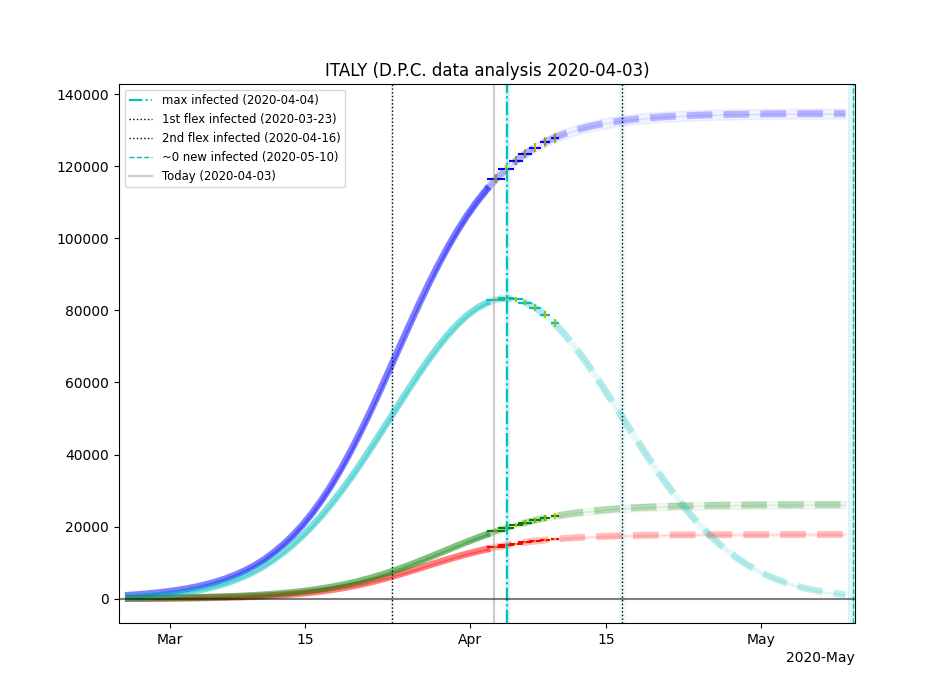

In [103]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[9.5, 7])
plt.title("ITALY (D.P.C. data analysis {})".format(dt.datetime.now().strftime("%Y-%m-%d")))
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)
ax.set_xlim(xg[0] - dt.timedelta(days=1), xg[-1] + dt.timedelta(days=1))

# CONFIRMED
# logistic fitted curve up to forecast limit
ax.plot(xg[:len(x)], yCg[:len(x)], alpha=0.5, c="b", linestyle="-", linewidth=5.0)
ax.plot(xg[len(x) - 1:], yCg[len(x) - 1:], alpha=0.25, c="b", linestyle="--", linewidth=5.0)
ax.fill_between(xg[:len(x)], yCg[:len(x)], yCgSup[:len(x)], alpha=0.15, color="b")
ax.fill_between(xg[len(x) - 1:], yCg[len(x) - 1:], yCgSup[len(x) - 1:], alpha=0.05, color="b")
ax.fill_between(xg[:len(x)], yCg[:len(x)], yCgInf[:len(x)], alpha=0.15, color="b")
ax.fill_between(xg[len(x) - 1:], yCg[len(x) - 1:], yCgInf[len(x) - 1:], alpha=0.05, color="b")

# maximum and flexes
for i in range(7):
    ax.scatter(yfC[i]["date"], yfC[i]["mean"], color="b", marker="_", edgecolors='#000000', s=150 - i * 20)
    plt.errorbar(yfC[i]["date"], yfC[i]["mean"], yerr=[yfC[i]["sup"] - yfC[i]["mean"]], uplims=[False], color="y")
    plt.errorbar(yfC[i]["date"], yfC[i]["mean"], yerr=[yfC[i]["mean"] - yfC[i]["inf"]], lolims=[False], color="y")

# DEATHS
# logistic fitted curve up to forecast limit
ax.plot(xg[:len(x)], yDg[:len(x)], alpha=0.5, c="r", linestyle="-", linewidth=5.0)
ax.plot(xg[len(x) - 1:], yDg[len(x) - 1:], alpha=0.25, c="r", linestyle="--", linewidth=5.0)
ax.fill_between(xg[:len(x)], yDg[:len(x)], yDgSup[:len(x)], alpha=0.15, color="r")
ax.fill_between(xg[len(x) - 1:], yDg[len(x) - 1:], yDgSup[len(x) - 1:], alpha=0.05, color="r")
ax.fill_between(xg[:len(x)], yDg[:len(x)], yDgInf[:len(x)], alpha=0.15, color="r")
ax.fill_between(xg[len(x) - 1:], yDg[len(x) - 1:], yDgInf[len(x) - 1:], alpha=0.05, color="r")

# maximum and flexes
for i in range(7):
    ax.scatter(yfD[i]["date"], yfD[i]["mean"], color="r", marker="_", edgecolors='#000000', s=150 - i * 20)
    plt.errorbar(yfD[i]["date"], yfD[i]["mean"], yerr=[yfD[i]["sup"] - yfD[i]["mean"]], uplims=[False], color="y")
    plt.errorbar(yfD[i]["date"], yfD[i]["mean"], yerr=[yfD[i]["mean"] - yfD[i]["inf"]], lolims=[False], color="y")

# RECOVERED
# logistic fitted curve up to forecast limit
ax.plot(xg[:len(x)], yRg[:len(x)], alpha=0.5, c="g", linestyle="-", linewidth=5.0)
ax.plot(xg[len(x) - 1:], yRg[len(x) - 1:], alpha=0.25, c="g", linestyle="--", linewidth=5.0)
ax.fill_between(xg[:len(x)], yRg[:len(x)], yRgSup[:len(x)], alpha=0.15, color="g")
ax.fill_between(xg[len(x) - 1:], yRg[len(x) - 1:], yRgSup[len(x) - 1:], alpha=0.05, color="g")
ax.fill_between(xg[:len(x)], yRg[:len(x)], yRgInf[:len(x)], alpha=0.15, color="g")
ax.fill_between(xg[len(x) - 1:], yRg[len(x) - 1:], yRgInf[len(x) - 1:], alpha=0.05, color="g")

# maximum and flexes
for i in range(7):
    ax.scatter(yfR[i]["date"], yfR[i]["mean"], color="g", marker="_", edgecolors='#000000', s=150 - i * 20)
    plt.errorbar(yfR[i]["date"], yfR[i]["mean"], yerr=[yfR[i]["sup"] - yfR[i]["mean"]], uplims=[False], color="y")
    plt.errorbar(yfR[i]["date"], yfR[i]["mean"], yerr=[yfR[i]["mean"] - yfR[i]["inf"]], lolims=[False], color="y")

# INFECTED
# gaussian fitted curve up to forecast limit
ax.plot(xg[:len(x)], yPg[:len(x)], alpha=0.5, c="c", linestyle="-", linewidth=5.0)
ax.plot(xg[len(x) - 1:], yPg[len(x) - 1:], alpha=0.25, c="c", linestyle="--", linewidth=5.0)
ax.fill_between(xg[:len(x)], yPg[:len(x)], yPgSup[:len(x)], alpha=0.15, color="c")
ax.fill_between(xg[len(x) - 1:], yPg[len(x) - 1:], yPgSup[len(x) - 1:], alpha=0.05, color="c")
ax.fill_between(xg[:len(x)], yPg[:len(x)], yPgInf[:len(x)], alpha=0.15, color="c")
ax.fill_between(xg[len(x) - 1:], yPg[len(x) - 1:], yPgInf[len(x) - 1:], alpha=0.05, color="c")
# maximum and flexes
plt.axvline(x=muP, linestyle="-.", color="c", label="max infected ({})".format(muP.strftime("%Y-%m-%d")))
ax.axvspan(muP, muPsup, alpha=0.1, color="c")
ax.axvspan(muP, muPinf, alpha=0.1, color="c")
# plt.text(muP, ymuP, "max " + muP.strftime("%Y-%m-%d"), fontsize=7, horizontalalignment='center', bbox=dict(facecolor='w', alpha=1), color="c")

plt.axvline(x=f1P, linestyle=":", color="k", label="1st flex infected ({})".format(f1P.strftime("%Y-%m-%d")), linewidth=1.0)
ax.axvspan(f1P, f1Psup, alpha=0.05, color="c")
ax.axvspan(f1P, f1Pinf, alpha=0.05, color="c")
# plt.text(f1P, yf1P, "flex " + f1P.strftime("%Y-%m-%d"), fontsize=5, horizontalalignment='center', bbox=dict(facecolor='w', alpha=1), color="c")

plt.axvline(x=f2P, linestyle=":", color="k", label="2nd flex infected ({})".format(f2P.strftime("%Y-%m-%d")), linewidth=1.0)
ax.axvspan(f2P, f2Psup, alpha=0.05, color="c")
ax.axvspan(f2P, f2Pinf, alpha=0.05, color="c")
# plt.text(f2P, yf2P, "flex " + f2P.strftime("%Y-%m-%d"), fontsize=5, horizontalalignment='center', bbox=dict(facecolor='w', alpha=1), color="c")

# ~0 infected/day date vertical line 
plt.axvline(x=noP, color="c", linestyle="--", linewidth=1.0, label="~0 new infected ({})".format(noP.strftime("%Y-%m-%d")))
ax.axvspan(noP, noPsup, alpha=0.1, color="c")
ax.axvspan(noP, noPinf, alpha=0.1, color="c")

for i in range(7):
    ax.scatter(yfP[i]["date"], yfP[i]["mean"], color="c", marker="_", edgecolors='#000000', s=150 - i * 20)
    plt.errorbar(yfP[i]["date"], yfP[i]["mean"], yerr=[yfP[i]["sup"] - yfP[i]["mean"]], uplims=[False], color="y")
    plt.errorbar(yfP[i]["date"], yfP[i]["mean"], yerr=[yfP[i]["mean"] - yfP[i]["inf"]], lolims=[False], color="y")

# TODAY date grey vertical line
plt.axvline(x=dt.datetime.now(), color="#999999", alpha=0.5, linestyle="-", label="Today ({})".format(dt.datetime.now().strftime("%Y-%m-%d")))
plt.axhline(y=0, color="k", alpha=0.5)

# LEGEND
plt.legend(loc='upper left', fontsize='small')
plt.show()